In [33]:
import tensorflow as tf
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import load_img

In [34]:
lt = [cv2.ROTATE_180,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_90_CLOCKWISE]
def brightness(img):
    value = random.uniform(0.5, 2)
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,: ,1] = hsv[:,: ,1]*value
    hsv[:,:,1][hsv[:,: ,1]>255] = 255
    hsv[:,: ,2] = hsv[:,: ,2]*value
    hsv[:,:,2][hsv[:,: ,2]>255] = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import pathlib
import glob
directory=pathlib.Path("/content/drive/MyDrive/vampire_dairies_dataset")

In [37]:
resultant="/content/augmentedimages"
items = os.listdir(directory)
classes=[]
count=0
images = []
labels=[]
for i in items:
    i1=0
    print(i)
    classes.append(i)
    path1 = f"{directory}/{i}"
    a = random.randint(5,10)
    img = cv2.imread(path1)
    img = cv2.resize(img,(224,224))
    k = i.split(".")[0]
    cv2.imwrite(f"{resultant}\{k}{i1}.png",img)
    i1+=1
    while a!=0:
        img = cv2.rotate(img,lt[random.randint(0,2)])
        images.append(img)
        cv2.imwrite(f"{resultant}\{k}{i1}.png",img)
        i1+=1
        labels.append(count)
        if a%2==0:
            img=brightness(img)
            images.append(img)
            cv2.imwrite(f"{resultant}\{k}{i1}.png",img)
            i1+=1
            labels.append(count)
        a-=1
    count+=1
images = np.array(images)
labels = np.array(labels)


demon.jpeg
elena.jpeg
stefan.jpeg
caroline.jpeg
bonnie.jpeg
matt.jpeg
tyler.jpeg
jeremy.jpeg
alaric.jpeg
klaus.jpeg
jenna.jpeg
enzo.jpeg
isobel.jpeg


In [38]:
images.shape

(134, 224, 224, 3)

In [39]:
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import *
from keras.applications.vgg16 import VGG16, preprocess_input

In [40]:
model = VGG16(weights="imagenet")
for i in model.layers:
    i.trainable = False
len(model. layers)

23

In [41]:
model. summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [42]:
 transferVGG = Sequential()

# adding layers from pre-trained model
for i in range(18):
    transferVGG.add(model.layers[i])

In [43]:
# adding custum layers
transferVGG.add(Flatten())
transferVGG.add(Dense(512,activation="relu"))
transferVGG.add(Dense(128,activation="relu"))
transferVGG.add(Dense(13,activation="Softmax"))

In [44]:
transferVGG.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [45]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
            print("cal1")
            if(logs.get('accuracy') > .99):
                    print("\nReached %2.2f%% accuracy, so stopping training! !" %(99))
                    self.model.stop_training = True
callbacks = myCallback()

In [46]:
transferVGG.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy" ])

In [47]:
 transferVGG.fit(images,labels,epochs=100,callbacks=[callbacks])

Epoch 1/100
5/5 [==============================] - 62s 12s/step - loss: 25.9027 - accuracy: 0.4104
Epoch 2/100
5/5 [==============================] - 54s 10s/step - loss: 4.3714 - accuracy: 0.9627
Epoch 3/100
5/5 [==============================] - 55s 11s/step - loss: 2.3308 - accuracy: 0.9478
Epoch 4/100
5/5 [==============================] - 54s 10s/step - loss: 0.9401 - accuracy: 0.9851
Epoch 5/100
5/5 [==============================] - 55s 10s/step - loss: 0.3380 - accuracy: 0.9776
Epoch 6/100
5/5 [==============================] - ETA: 0s - loss: 0.0135 - accuracy: 0.9925 cal1

Reached 99.00% accuracy, so stopping training! !
5/5 [==============================] - 57s 11s/step - loss: 0.0135 - accuracy: 0.9925


In [48]:
def predict(i,transfervGG, labels):
  path1 = f"{directory}/{i}"
  img = cv2.imread(path1)
  img = cv2.resize(img, (224,224))
  a = np.argmax(transfervGG.predict(np.array([img])))
  img = cv2.putText(img, labels[a], (25,25), cv2.FONT_HERSHEY_SIMPLEX,1, (225,225,0), 3, cv2.LINE_AA)
  plt.imshow(img)

1/1 [==============================] - 0s 391ms/step


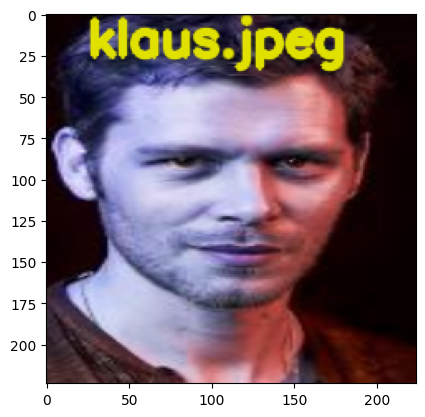

In [52]:
predict("klaus.jpeg",transferVGG, classes)